In [23]:
from PIL import Image
import cv2
import numpy as np
import requests

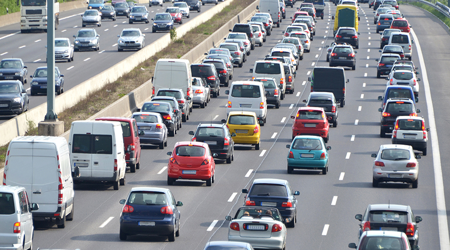

In [24]:
image = Image.open(requests.get('https://www.iii.org/sites/default/files/p_cars_highway_522785736.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

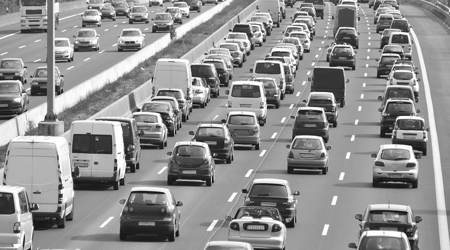

In [25]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

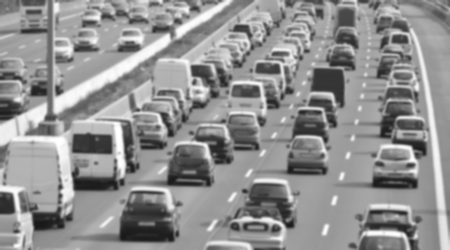

In [26]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

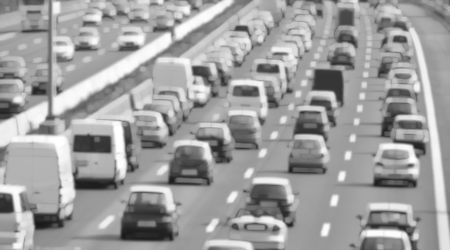

In [27]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

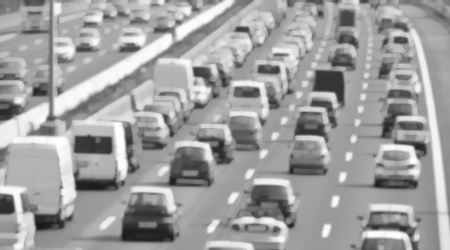

In [28]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [29]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[124,   4,  28,  28],
       [ 67,  26,  37,  37],
       [102,  19,  48,  48],
       [  2,   4,  44,  44],
       [271,  42,  20,  20],
       [255,  52,  30,  30],
       [303,  49,  45,  45],
       [393,  63,  23,  23],
       [220,  63,  48,  48],
       [145,  68,  45,  45],
       [276,  93,  61,  61],
       [394, 107,  30,  30],
       [ 16, 101,  49,  49],
       [ 53, 100,  73,  73],
       [133, 120,  43,  43],
       [223, 117,  47,  47],
       [275, 128,  64,  64],
       [151, 128,  78,  78],
       [363, 145,  62,  62],
       [ 55, 132,  83,  83],
       [226, 151,  71,  71],
       [204, 200,  44,  44],
       [ 20, 188,  59,  59],
       [103, 167,  81,  81]], dtype=int32)

24  cars found


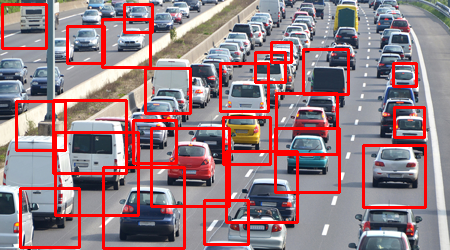

In [31]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)